#                   Outliers
![](outlier.png)

In [1]:
import pandas as pd

# Generamos un dataframe de ejemplo a partir de una estructura de diccionario de Python
df = pd.DataFrame.from_dict({
    'Estudiante': ['Juan', 'Carlos', 'Ana', 'Luis', 'Bea', 'Sonia', 'Jesús'],
    'Inglés': [90, 95, 75, 93, 60, 85, 75],
    'Química': [95, 95, 75, 65, 50, 85, 100],
    'Matemáticas': [100, 95, 50, 75, 90, 50, 80]
})

print(df.head(10))

  Estudiante  Inglés  Química  Matemáticas
0       Juan      90       95          100
1     Carlos      95       95           95
2        Ana      75       75           50
3       Luis      93       65           75
4        Bea      60       50           90
5      Sonia      85       85           50
6      Jesús      75      100           80


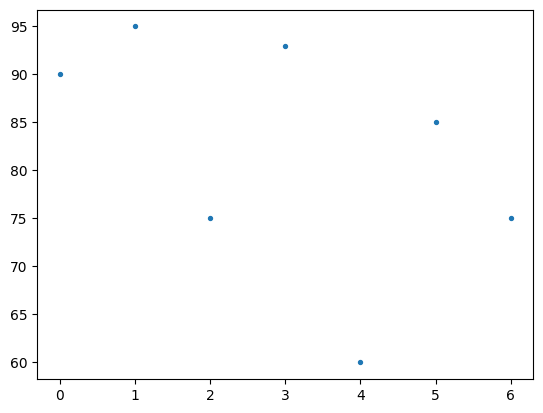

In [4]:
import matplotlib.pyplot as plt

# Dibujamos la dispersión de notas
plt.scatter(df.index, df["Inglés"], s=8)
plt.show()

In [5]:
# Calculamos el percentil del 50% en la asignatura de Inglés
q = df["Inglés"].quantile(0.50)
print(q)

85.0


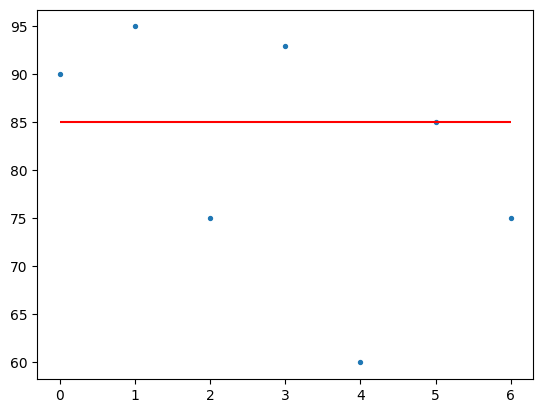

In [6]:
# Dibujamos el percentil del 50% en Inglés
plt.scatter(df.index, df["Inglés"], s=8)
plt.hlines(y=q, xmin=0, xmax=6, colors='red')
plt.show()

In [7]:
# Calculamos el percentil del 99%
q = df["Inglés"].quantile(0.99)
print(q)

94.88


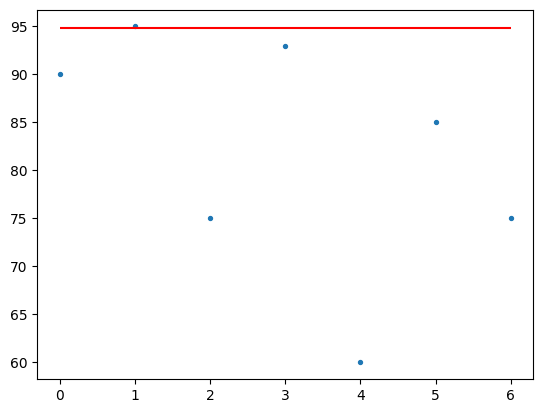

In [8]:
# Dibujamos el percentil del 99% en Inglés
plt.scatter(df.index, df["Inglés"], s=8)
plt.hlines(y=q, xmin=0, xmax=6, colors='red')
plt.show()

In [9]:
# Mostramos los nota de Inglés umbral (threshold) que marca el percentil del 99%
q = df["Inglés"].quantile(0.99)
print(q)

# Eliminamos del dataframe los alumnos cuya nota de Inglés está por encima del percentil del 99% (criterio de filtrado)
df = df[df["Inglés"] < q]
print(df.head(10))

94.88
  Estudiante  Inglés  Química  Matemáticas
0       Juan      90       95          100
2        Ana      75       75           50
3       Luis      93       65           75
4        Bea      60       50           90
5      Sonia      85       85           50
6      Jesús      75      100           80


In [11]:
# Ha eliminado a Carlos porque tenía una nota muy alta. Al no haber verdaderos outliers,
# hemos eliminado a un alumno cuyas notas eran correctas. Vamos a añadir un alumno con datos
# absurdos, un outlier verdadero
df = pd.DataFrame.from_dict({
    'Estudiante': ['Juan', 'Carlos', 'Ana', 'Luis', 'Bea', 'Sonia', 'Jesús', 'Alberto'],
    'Inglés': [90, 95, 75, 93, 60, 85, 75, 125],
    'Química': [95, 95, 75, 65, 50, 85, 100, 150],
    'Matemáticas': [100, 95, 50, 75, 90, 50, 80, 135]
})
print(df.head(10))

  Estudiante  Inglés  Química  Matemáticas
0       Juan      90       95          100
1     Carlos      95       95           95
2        Ana      75       75           50
3       Luis      93       65           75
4        Bea      60       50           90
5      Sonia      85       85           50
6      Jesús      75      100           80
7    Alberto     125      150          135


In [12]:
# Mostramos los nota de Inglés umbral (threshold) que marca el percentil del 99%
q = df["Inglés"].quantile(0.99)
print(q)

122.89999999999999


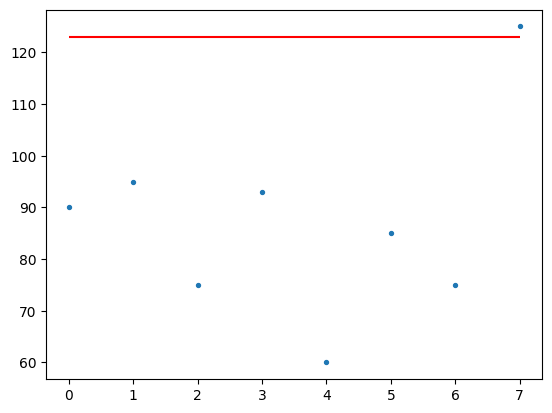

In [13]:
# Dibujamos el percentil del 99% en Inglés
plt.scatter(df.index, df["Inglés"], s=8)
plt.hlines(y=q, xmin=0, xmax=7, colors='red')
plt.show()

In [14]:
# Eliminamos del dataframe los alumnos cuya nota de Inglés está por encima del percentil del 99% (criterio de filtrado)
df = df[df["Inglés"] < q]
print(df.head(10))

  Estudiante  Inglés  Química  Matemáticas
0       Juan      90       95          100
1     Carlos      95       95           95
2        Ana      75       75           50
3       Luis      93       65           75
4        Bea      60       50           90
5      Sonia      85       85           50
6      Jesús      75      100           80


In [15]:
# Umbral inferior
df = pd.DataFrame.from_dict({
    'Propietarios': ['Juan', 'Carlos', 'Ana', 'Luis', 'Bea', 'Sonia', 'Jesús', 'Alberto'],
    'Precio': [90000, 95000, 75000, 93000, 60000, 85000, 75000, 5000],
    })
print(df.head(10))

  Propietarios  Precio
0         Juan   90000
1       Carlos   95000
2          Ana   75000
3         Luis   93000
4          Bea   60000
5        Sonia   85000
6        Jesús   75000
7      Alberto    5000


In [16]:
q = df["Precio"].quantile(0.01)
print(q)

8850.0


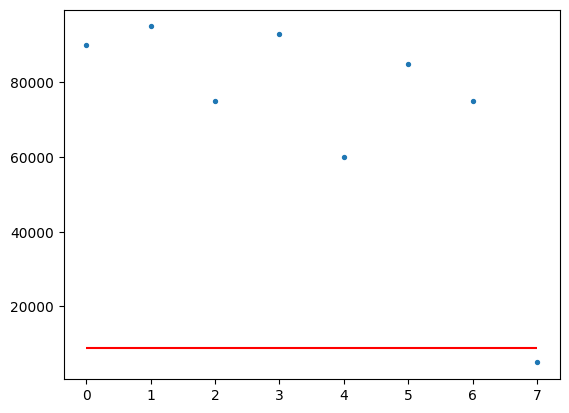

In [17]:
# Dibujamos el percentil del 1% en Precios
plt.scatter(df.index, df["Precio"], s=8)
plt.hlines(y=q, xmin=0, xmax=7, colors='red')
plt.show()

In [18]:
# Eliminamos del dataframe los propietarios cuyos pisos son demasiado baratos
df = df[df["Precio"] > q]
print(df.head(10))

  Propietarios  Precio
0         Juan   90000
1       Carlos   95000
2          Ana   75000
3         Luis   93000
4          Bea   60000
5        Sonia   85000
6        Jesús   75000
